In [1]:
import numpy as np
import pathlib as Path
import os
import re
import scipy as sp
import matplotlib.pyplot as plt

from sklearn import cluster
from scipy.cluster.vq import vq

In [33]:
dir = Path.Path(os.getcwd())
data_list = list(dir.glob('*.npy'))

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys_file_name(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [atoi(c) for c in re.split(r'(\d+)', text.stem)]

data_list.sort(key=natural_keys_file_name)
xy_data = np.load(data_list[0]).T
del data_list[0]
for file in data_list:
    xy_loaded = np.load(file).T
    xy_data = np.vstack((xy_data, xy_loaded))
print(xy_data)

[[9.30580852e-04 9.35910109e-04 9.38558393e-04 ... 2.95085876e-02
  3.29119591e-02 7.48528265e-05]
 [6.24453518e-04 6.46587433e-04 6.69014648e-04 ... 9.74146552e-05
  1.39402131e-02 3.69924712e-02]
 [1.53750519e-04 2.06085955e-04 2.47554758e-04 ... 1.31735397e-03
  4.45259309e-03 1.54681843e-02]
 ...
 [1.37871684e-04 1.92756927e-04 2.34211587e-04 ... 1.02745731e-02
  1.46036100e-02 2.43419443e-03]
 [3.60706800e-04 3.88936640e-04 4.11756026e-04 ... 1.50532250e-02
  7.65140634e-03 2.81308735e-02]
 [2.14299480e-04 2.54434939e-04 2.87073712e-04 ... 8.29510535e-03
  1.70804969e-02 1.31131584e-02]]


In [34]:
n_clusters = 4
np.random.seed(0)
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=4)
k_means.fit(xy_data)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_

features = xy_data

code_book = values

labels, distance = vq(features,code_book)

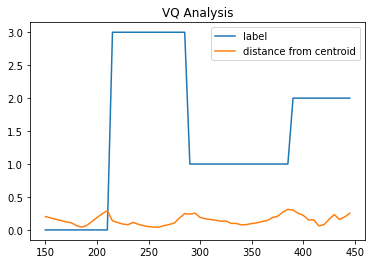

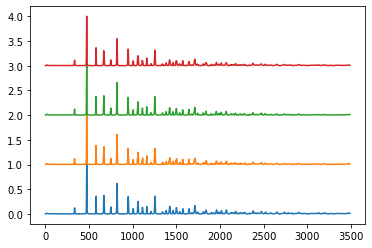

In [4]:
fig, ax1 = plt.subplots() 
ax1.plot(range(150, 450, 5), labels, label='label')
ax1.plot(range(150, 450, 5), distance, label='distance from centroid')
ax1.set_title("VQ Analysis")
ax1.legend()

fig, ax2 = plt.subplots() 
offset = 0
for value in values:
    ax2.plot(value + offset)
    offset += value.max()

Figure out if there is a cutoff

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_26416/2236017149.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  improvement_ratio = current_norm/prior_norm if i!=1 else 0


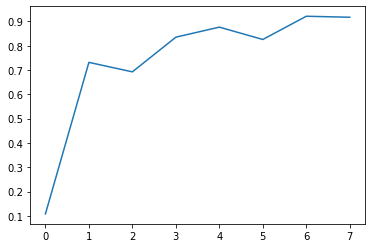

In [40]:
fro_norm =[]
prior_norm = 0
for i in range(1,10):
    n_clusters = i
    np.random.seed(0)
    k_means = cluster.KMeans(n_clusters=n_clusters, n_init=i)
    k_means.fit(xy_data)
    values = k_means.cluster_centers_.squeeze()
    labels = k_means.labels_
    vq_reconstruction = xy_data.copy()
    for i, row in enumerate(vq_reconstruction):
        vq_reconstruction[i,:] = values[labels[i]]
    current_norm = np.linalg.norm(xy_data - vq_reconstruction, ord='fro')
    improvement_ratio = current_norm/prior_norm if i!=1 else 0
    prior_norm = current_norm 
    fro_norm.append(improvement_ratio)
del fro_norm[0]
fig, ax = plt.subplots()
ax.plot(fro_norm)

In [21]:
for i, value in enumerate(values):
    xy_data = np.vstack((np.array(range(len(value))),value.T)).T
    np.savetxt(os.path.join(os.getcwd(), f'vq_component_{i}.xy'), xy_data)

Compare to Conventional NMF Outputs

In [28]:
dir = Path.Path(os.getcwd())
data_list = list(dir.glob('NMF*'))

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys_file_name(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [atoi(c) for c in re.split(r'(\d+)', text.stem)]

data_list.sort(key=natural_keys_file_name)
NMF_data = np.loadtxt(data_list[0], comments='!').T[1]
del data_list[0]
for file in data_list:
    xy_loaded = np.loadtxt(file, comments='!').T[1]
    NMF_data = np.vstack((NMF_data, xy_loaded))
NMF_data

array([[7.96515500e-04, 8.09930600e-04, 8.23288900e-04, ...,
        2.22547188e-02, 1.67781396e-02, 1.22368280e-02],
       [1.31422800e-04, 1.71184000e-04, 2.10542700e-04, ...,
        5.17163080e-03, 8.37693140e-03, 1.81812470e-03],
       [2.78781000e-05, 5.62757000e-05, 8.33325000e-05, ...,
        2.97408090e-03, 7.52520820e-03, 8.65191470e-03],
       [6.97966400e-04, 6.99267100e-04, 7.02592900e-04, ...,
        1.55690932e-02, 1.53075187e-02, 7.28939550e-03]])

In [39]:
for i in range(4):
    print(sp.stats.pearsonr(NMF_data[i],values[i])[0])

0.9107920458347414
0.9039119212994917
0.9872209851819318
0.8309281239285546
